### *“At the end of the day, we can endure much more than we think we can.”*
*-Frida Kahlo, 20th-century Mexican painter*

----

YOUR NAME HERE: Brandon Rank

----

# Lab L: Bar Graphs and Group By

---

Begin by importing the new plotting package below.

In [ ]:
import numpy as np
import pandas as pd
import sqlite3 as sql  #SQL!
import matplotlib.pyplot as plt #picture making!
plt.style.use('fivethirtyeight') #A helpful style package

### Visualizing Categorical Distributions ###

Data come in many forms that are not numerical. Data can be pieces of music, or places on a map. They can also be categories into which you can place individuals. Here are some examples of *categorical* variables.

- The individuals are cartons of ice-cream, and the variable is the flavor in the carton.
- The individuals are professional basketball players, and the variable is the player's team.
- The individuals are years, and the variable is the genre of the highest grossing movie of the year.
- The individuals are survey respondents, and the variable is the response they choose from among "Not at all satisfied," "Somewhat satisfied," and "Very satisfied."

Below I set up an  `icecream` dataframe that contains data on 30 cartons of ice-cream.

In [ ]:
icecream_dict = {'Flavor' : np.array(['Chocolate', 'Strawberry', 'Vanilla']),
                 'Number of Cartons' : np.array([16, 5, 9])}

icecream = pd.DataFrame(icecream_dict)
icecream

,Flavor,Number of Cartons
0,Chocolate,16
1,Strawberry,5
2,Vanilla,9


The *values* of the categorical variable "flavor" are chocolate, strawberry, and vanilla. The table shows the number of cartons of each flavor. We call this a *distribution table*. A *distribution* shows all the values of a variable, along with the frequency of each one.

### Bar Chart ###
The bar chart is a familiar way of visualizing categorical distributions. It displays a bar for each category. The bars are equally spaced and equally wide. The length of each bar is proportional to the frequency of the corresponding category.

The `bar` method from the `plt` package takes two arguments: the first is the column label of the categories, and the second is the column label of the frequencies.

Text(0.5, 1.0, 'Cartons per Flavor')

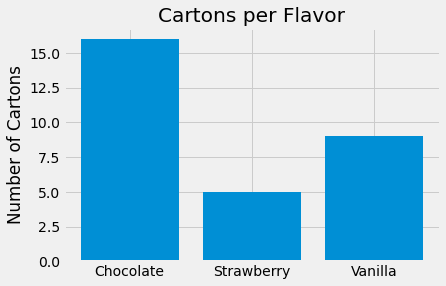

In [ ]:
plt.bar(icecream['Flavor'], icecream['Number of Cartons'])
plt.ylabel('Number of Cartons')
plt.title('Cartons per Flavor')

We will often draw bar charts with horizontal bars because it's easier to label the bars that way. The method to use here is called `barh` and it takes the same input as `bar`.

Text(0.5, 1.0, 'Cartons per Flavor')

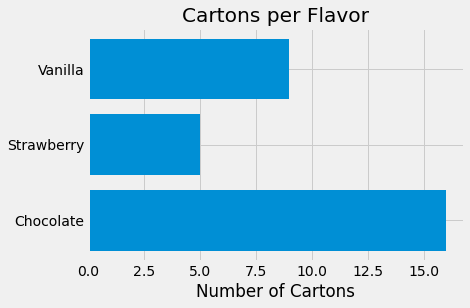

In [ ]:
plt.barh(icecream['Flavor'], icecream['Number of Cartons'])
plt.xlabel('Number of Cartons')
plt.title('Cartons per Flavor')

### Features of Categorical Distributions ###
Apart from purely visual differences, there is an important fundamental distinction between bar charts and the two graphs that we saw in the previous sections. Those were the scatter plot and the line plot, both of which display two numerical variables – the variables on both axes are numerical. **In contrast, the bar chart has categories on one axis and numerical frequencies on the other.**

This has consequences for the chart. First, the width of each bar and the space between consecutive bars is entirely up to the person who is producing the graph, or to the program being used to produce it. Python made those choices for us. If you were to draw the bar graph by hand, you could make completely different choices and still have a perfectly correct bar graph, provided you drew all the bars with the same width and kept all the spaces the same.

**Most importantly, the bars can be drawn in any order.** The categories "chocolate," "vanilla," and "strawberry" have no universal rank order, unlike for example the numbers 5, 7, and 10.

This means that we can draw a bar chart that is easier to interpret, by rearranging the bars in decreasing order. To do this, you can either:

* Use the ORDER BY command in SQL.  We cannot use this option because we did not load the ice cream data into a SQL query.
* Sort by using Python, that is, use the Python ```sort_values``` function  for data frames which has this syntax:

  * ```nba.sort_values(by='SALARY') #Sorts the Salary col of the nba dataframe in ascending order ```

  * ```nba.sort_values(by='SALARY', ascending=False) #Sorts Descending (Lowest to Highest)```

We'll use the second option to first rearrange the rows of `icecream` in decreasing order of `Number of Cartons`, and then draw the bar chart.

---

# **Question 1**

A) Sort the icecream chart so that it is ascending in its number of cartons

In [ ]:
#sort here with Python - no SQL
icecream = icecream.sort_values(by = "Number of Cartons", ascending = False)
icecream

,Flavor,Number of Cartons
0,Chocolate,16
2,Vanilla,9
1,Strawberry,5


B) Now redraw the barchart (using the `bar` command) so that from left to right the flavors are in descending order,ie, Chocolate before Vanilla before Strawberry

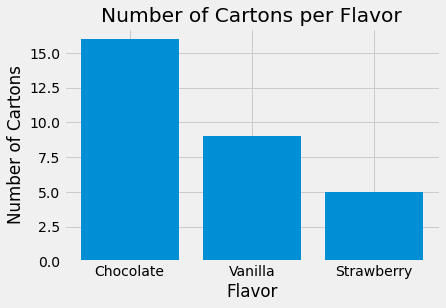

In [ ]:
plt.bar(icecream["Flavor"],icecream["Number of Cartons"])
plt.title("Number of Cartons per Flavor")
plt.xlabel("Flavor")
plt.ylabel("Number of Cartons");

C) Finally, redraw the horizontal barchart (using the `barh` command) so that from top to bottom the flavors are in descending order,ie, Chocolate above Vanilla above Strawberry

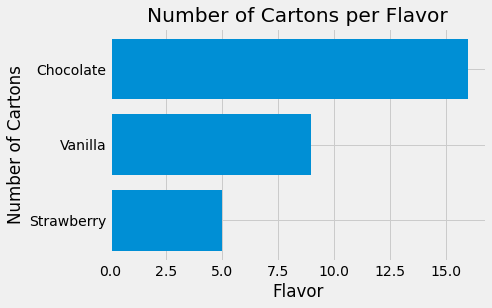

In [ ]:
plt.barh(icecream["Flavor"],icecream["Number of Cartons"])
plt.title("Number of Cartons per Flavor")
plt.xlabel("Flavor")
plt.ylabel("Number of Cartons");

---

### Rule of Thumb:  Always sort the categories in a bar chart.  

The sorted bar charts in the previous question contains exactly the same information as before, but it is a little easier to read. While this is not a huge gain in reading a chart with just three bars, it can be quite significant when the number of categories is large.

So always sort the categories in a bar chart. The only exception is when there is a natural ordering on the x axis.  For example, below, the categories are years and it is natural to show years from earliest to latest.

![shark-bar-chart](https://github.com/kathleen-ryan-DeSales/CS250/blob/main/pictures/shark_barchart.png?raw=true)



---
### Grouping Categorical Data ###

To construct the table `icecream`, someone had to look at all 30 cartons of ice-cream and count the number of each flavor. SQL allows us to do that with the GROUP BY clause, so we can use a GROUP BY clause and then use it to create a visualization.

For the next question, we'll use these 2 columns from the partner perferences survey that I gave last semester in class:

 * Partner_Preference:  Would you like a partner for the final project?
 * Python_Feeling:  Rate how you are feeling with Python  (1-5 with 5 meaning you feel very strong.)

Let's load in the partner preferences data.

In [ ]:
try:
    #Read in the needed csvs and create the DB
    preferences = pd.read_csv('partner_preferences.csv')
    conn = sql.connect('preferences.db')
    preferences.to_sql('preferences', conn,  index = False)

except:

    print("Issue during DB creation/connection")

In [ ]:
sql_statement = """SELECT *
                   FROM preferences"""

preferences = pd.read_sql_query(sql_statement, conn)  #Call the results game_stop
preferences

,Partner_Preference,Python_Feeling
0,Yes,5
1,No preference,5
2,Yes,3
3,Yes,2
4,Yes,4
5,Yes,4
6,Yes,3
7,Yes,3
8,Yes,4
9,Yes,2


---
# **Question 2**

A) STEP 1: Use SQL to get a count of how many people rated their feeling with Python as a 1, 2, 3, 4, 5.  Call the second column ```num_students```.


In [ ]:
sql_statement = """SELECT Python_Feeling, COUNT(Python_Feeling) AS num_students
                   FROM preferences
                   GROUP BY Python_Feeling;"""

pref_counts = pd.read_sql_query(sql_statement, conn )  #Call the results game_stop
pref_counts

,Python_Feeling,num_students
0,2,3
1,3,5
2,4,4
3,5,4


B) ASIDE: Notice no one opted to choose a "1", so we can add a count of 0 for "1" to our table.

To do this, we'll add a union statement to your SQL statement.  Go ahead  and replaces the ellipsis below with your SQL statement from (A).  This should generate the table below.

|   | Python_Feeling | num_students |
|--:|---------------:|-------------:|
| 0 | 2              | 3            |
| 1 | 3              | 5            |
| 2 | 4              | 4            |
| 3 | 5              | 4            |

In [ ]:
sql_statement = """SELECT Python_Feeling, COUNT(Python_Feeling) AS num_students
                   FROM preferences
                   GROUP BY Python_Feeling

                   UNION

                   SELECT 1, 0   --This creates a new record with 2 columns that contain a 1 then a 0.

                   """

pref_counts = pd.read_sql_query(sql_statement, conn )  #Call the results game_stop
pref_counts

,Python_Feeling,num_students
0,1,0
1,2,3
2,3,5
3,4,4
4,5,4


C) STEP 2:  Create a bar chart for this data.  Use ``bar`` instead of ``barh`` here.

Be sure to:

 * Label the y axis with "Number of Students"
 * Give the graph a title of "Feeling with Python".

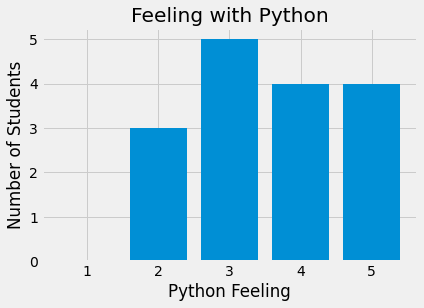

In [ ]:
plt.bar(pref_counts["Python_Feeling"], pref_counts["num_students"])
plt.title("Feeling with Python")
plt.ylabel("Number of Students")
plt.xlabel("Python Feeling");

Notice how python sorted the categories on the x axis for you, since the categories (1,2,3,4,5)  were numerical.

---

# **Question 3**

Build this bar chart **EXACTLY**, including the ordering.

![partner-prefs-image](https://github.com/kathleen-ryan-DeSales/CS250/blob/main/pictures/partner_prefs.png?raw=true)

**HINT:**  

* The tough part will be ordering the bars as "Yes", then "No", then "No preference".  So first just create the bar chart without worrying about the x axis ordering.
* Once you have the bar plot showing in the wrong order, create a new column called "order" with the desired order.  set the values in this column so that the "Yes" row has a 1, "No" has a 2, and "No preference" has a 3.  Then sort on the "order" column before making the bar chart.

In [ ]:
#SQL command here
sql_statement = """SELECT Partner_Preference, COUNT(Partner_Preference) AS num_students
                   FROM preferences
                   GROUP BY Partner_Preference
                   """

partner_counts = pd.read_sql_query(sql_statement, conn )  #Call the results game_stop
partner_counts

,Partner_Preference,num_students
0,No preference,3
1,Yes,13


In [ ]:
#Update SQL command to get a "No" row with a 0
sql_statement = """SELECT Partner_Preference, COUNT(Partner_Preference) AS num_students
                   FROM preferences
                   GROUP BY Partner_Preference

                   UNION

                   SELECT 'No', 0

                   """

partner_counts = pd.read_sql_query(sql_statement, conn )  #Call the results game_stop
partner_counts

,Partner_Preference,num_students
0,No,0
1,No preference,3
2,Yes,13


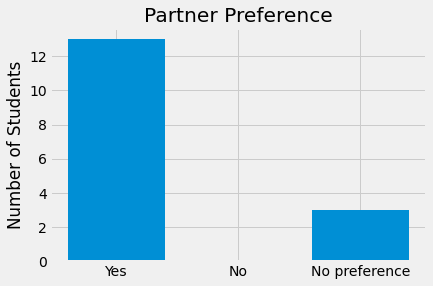

In [ ]:
partner_counts["order"] = [3, 1, 2]
partner_counts = partner_counts.sort_values(by = "order")

plt.bar(partner_counts["Partner_Preference"], partner_counts["num_students"])
plt.title("Partner Preference")
plt.ylabel("Number of Students");

---


# The Iris Data Set

We are going to look at a data set about irises.  The iris data set consists of information about 3 different types of irises (0-Setosa, 1-Versicolour, and 2-Virginica), specifically their petal and sepal length.

![image.png](https://plantid.net/Classic/Glossary/Sepal_files/image001.png)


To generate this data set, 150 iris flowers were sampled and their Sepal Length, Sepal Width, Petal Length and Petal Width, all in centimeters, were recorded.

In [ ]:
#close previous connection
conn.close()

In [ ]:
try:
    #Read in the needed csvs and create the DB
    iris = pd.read_csv("iris.data")
    conn = sql.connect('iris.db')
    iris.to_sql('iris', conn,  index = False)

except:

    print("Issue during DB creation/connection")

In [ ]:
sql_statement = """SELECT * FROM iris

                   """

iris = pd.read_sql_query(sql_statement, conn )  #Call the results game_stop
iris

,sepal_length,speal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


---

# **Question 6**

Generate a table of the average sepal length/width and average petal length/width per type, as shown below.

Be sure to rename the columns as shown.


|          | **avg_sepal_length** | **avg_sepal_width** | **avg_petal_length** | **avg_petal_width** |
|---------:|-----------------:|----------------:|-----------------:|----------------:|
| **Type** |                  |                 |                  |                 |
|        Setosa |            5.006 |           3.428 |            1.462 |           0.246 |
|        Versicolour |            5.936 |           2.770 |            4.260 |           1.326 |
|        Virginica |            6.588 |           2.974 |            5.552 |           2.026 |

In [ ]:
sql_statement = """SELECT class AS Type, AVG(sepal_length) AS avg_sepal_length, AVG(speal_width) AS avg_sepal_width, AVG(petal_length) AS avg_petal_length, AVG(petal_width) AS avg_petal_width
                   FROM iris
                   GROUP BY class

                   """

iris = pd.read_sql_query(sql_statement, conn )  #Call the results game_stop
iris

,Type,avg_sepal_length,avg_sepal_width,avg_petal_length,avg_petal_width
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


B) Generate a bar graph showing the average_sepal_length per iris type.

**Be sure of course to sort the bars from highest to lowest and to label both axes and give a professional title.**


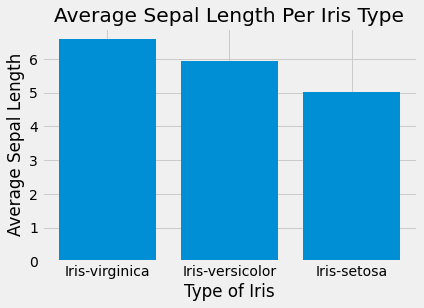

In [ ]:
# bar chart code here
iris = iris.sort_values(by = "avg_sepal_length", ascending = False)
plt.bar(iris["Type"], iris["avg_sepal_length"])
plt.title('Average Sepal Length Per Iris Type')
plt.xlabel('Type of Iris')
plt.ylabel('Average Sepal Length');